1.	(5 points) An instructor is interested in the degree to which students’ final grades from his wine tasting course associates with the blood alcohol content (BAC) of the students after the final wine tasting exam (note: it is advisable for wine tasters to “spit out” their wine after each sample so that they can effectively judge the quality a large number of wine samples).  Therefore, the final grades from 25 randomly selected students who took both of these courses were collected. These data are presented in the file called “HW13_Q1.xlsx”. 

a.	(2 points) Fit a simple linear regression model by hand (or using Excel). Also provide output from R and/or SAS. Let the performance on the final exam be the dependent variable (Y) and the BAC be the independent variable (X). Please write down the model, and show all of your work. Show the null and alternative hypotheses for the Model term in the ANOVA table and the Intercept and BAC terms in the Parameter Estimates table. Make a decision and give a complete conclusion for each of these three tests at α = 0.05.


$$
Y_i = \beta_0 + \beta_1 x_i + \epsilon_i, i=1,..., 25
$$

#### Model:
$$
H_0: \beta_1 = 0
$$

$$
H_a: \beta_1 \neq 0
$$

#### Intercept:
$$
H_0: \beta_0  = 0
$$
$$
H_a: \beta_0 \neq 0
$$

#### BAC:

$$
H_0: \beta_1 = 0
$$

$$
H_a: \beta_1 \neq 0
$$



In [3]:
hw13_q1 <- read.csv('HW13_Q1.csv', header=T)

modl <- lm(Final ~ BAC, data=hw13_q1)
anova(modl)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
BAC,1,3.340537,3.340537,0.01772071,0.895257
Residuals,23,4335.738,188.5104,NA,NA


In [12]:
round(summary(modl)$coefficients,4)

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),77.5455,7.7395,10.0194,0.0000
BAC,9.3338,70.1163,0.1331,0.8953


We can conclude from the preceding tables that while we fail to reject the null hypothesis for the slope parameter in the linear model, we do reject the null hypothesis for the intercept. Therefore, we can conclude that there is not enough evidence to support an effect of BAC on the final score, however we can state that the average final grade is significantly different from 0.

b.	(1 point) By hand and in R and/or SAS, calculate a 95% confidence interval for the intercept and slope. Please show all of your work.


In [13]:
confint(modl)

,2.5 %,97.5 %
(Intercept),61.53514,93.55596
BAC,-135.7128,154.3804


$$
\hat{\beta_j} \pm t_{\alpha/2}\sqrt{\frac{MSE}{S_{jj}}}
$$

$$
77.754555 \pm 2.068 \sqrt{188.5104}\sqrt{1/25+(0.1032)^2/0.038344} = (61.53514,	93.55596)
$$

$$
9.3338 \pm  2.068 \sqrt{\frac{188.5104}{0.038344}} = (-135.7128,154.3804)
$$

c.	(2 points) By hand and in R and/or SAS, predict the estimated final grade if their BAC was 0.02. Also calculate a 95% confidence interval for E{Yn+1} and the 95% prediction interval for Yn+1. Interpret both of the intervals. Please describe the difference between a confidence interval and a prediction interval. Discuss which interval is wider and why.


#### Confidence Interval 
$$
\hat{y_{n+1}} \pm t_{\alpha/2}S_{\epsilon}\sqrt{1/n + (x_{n+1} - \bar{x})^2/S_{xx}}
$$

#### Prediction Interval
$$
\hat{y_{n+1}} \pm t_{\alpha/2}S_{\epsilon}\sqrt{1+1/n + (x_{n+1}-\bar{x})^2/S_{xx}}
$$



In [22]:
y_hat <- coef(modl)%*%c(1, 0.02)
MSE <- sum(residuals(modl)^2)/modl$df.residual
SE <- 1/nrow(hw13_q1)+(0.02 - mean(hw13_q1$BAC))^2/sum((hw13_q1$BAC 
                                                    - mean(hw13_q1$BAC))^2)
y_hat + c(-1,1)*qt(.975, nrow(hw13_q1)-2)*sqrt(MSE)*sqrt(SE)

[1] 64.39425 91.07020

In [23]:
SE <-  1+1/nrow(hw13_q1)+(0.02 - mean(hw13_q1$BAC))^2/sum((hw13_q1$BAC 
                                                    - mean(hw13_q1$BAC))^2)
y_hat + c(-1,1)*qt(.975, nrow(hw13_q1)-2)*sqrt(MSE)*sqrt(SE)

[1]  46.35385 109.11060

A confidence interval is an interval estimator for the fixed interval around the mean such that with 95% confidence the population mean of the predicted response will be included. The prediction interval is an interval estimator that has nominal coverage for all possible values that the predicted value could take, not what the expected value would take. Therefore the prediction interval is wider as it encapsulates all possible values for the prediction response with 95% confidence

2.	(5 points) A group of planners for an upcoming half marathon are interested in determining the relationship between a runner’s time to complete a 5K race and their time to complete a half marathon. Within the context of this problem, assume that the time to completion of a half marathon is the dependent variable (Y), and the time to completion of a 5K is the independent variable (X). The collected data are presented in “HW13_Q2.xlsx”.

a.	(1 point) Plot Y against X in R or SAS, and then comment on whether you think a first-order linear relationship, a second-order quadratic relationship, or a third-order cubic relationship best models the relationship between the dependent and independent variables. 



[1] "Runner_ID"                                 
[2] "X5K_Time_to_Completion_.minutes."          
[3] "Half_Marathon_Time_to_Completion_.minutes."

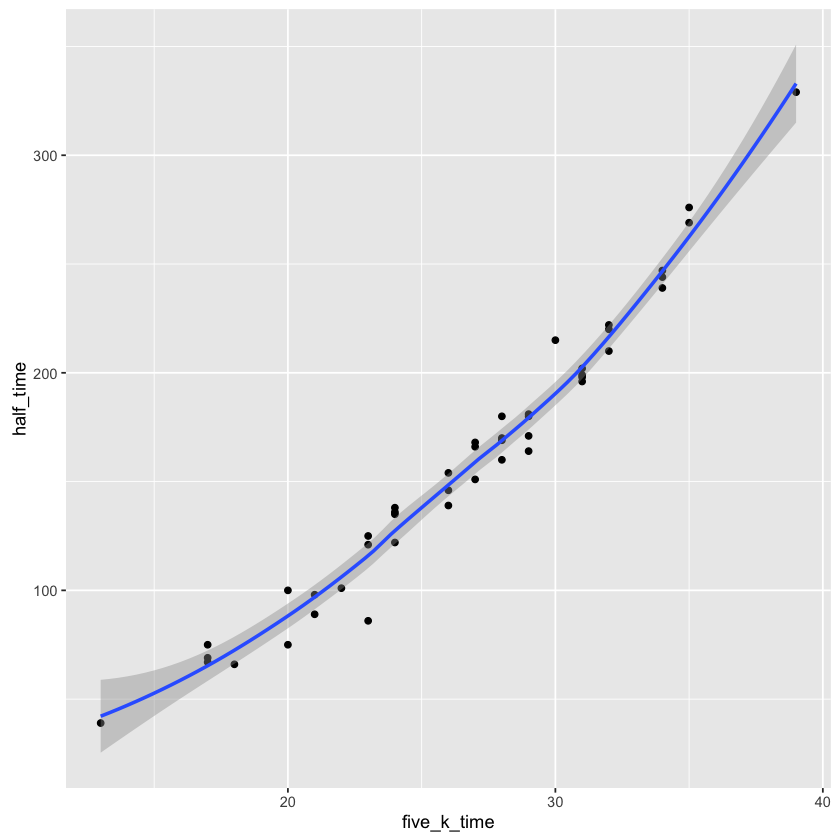

In [31]:
hw13_q2 <- read.csv("HW13_Q2.csv", header=T)
library(magrittr)
hw13_q2 %>% colnames(.)

colnames(hw13_q2) <- c("id", "five_k_time", "half_time")


library(ggplot2)


ggplot(aes(five_k_time,
           half_time), data=hw13_q2) +
geom_point() + 
geom_smooth()

#### The smoother implies a slight quadratic effect.

a.	(1 point) Fit a simple linear regression model and conduct the Lack of Fit test. While you are doing this, fill in the table below. You can use SAS and/or R to fill in the Model, Error, and Corrected Total, but show your work for the Lack of Fit and Pure Error lines. Additionally, show the null and alternative hypotheses for the test of Lack of Fit, make a decision for that test and then give a complete conclusion. Use α = 0.05.


In [32]:
modl2 <- lm(half_time ~ five_k_time, data=hw13_q2)

In [33]:
anova(modl2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
five_k_time,1,170580.9,170580.9,944.8658,6.69072e-31
Residuals,43,7762.986,180.5346,NA,NA


In [34]:
modl_lof <- lm(half_time ~ factor(five_k_time), data=hw13_q2)
anova(modl2, modl_lof)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
1,43,7762.986,NA,NA,NA,NA
2,27,2305.75,16,5457.236,3.993965,0.0007657242


The lack of fit test is significant at the $\alpha=0.05$ level. Thus reject the null hypothesis that a linear regression model is appropriate. 

In [35]:
modl2 <- lm(half_time ~ five_k_time + I(five_k_time^2), data=hw13_q2)
modl_lof <- lm(half_time ~ factor(five_k_time), data=hw13_q2)
anova(modl2, modl_lof)


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
1,43,7762.986,NA,NA,NA,NA
2,27,2305.75,16,5457.236,3.993965,0.0007657242


In [41]:
modl3 <- lm(half_time ~ five_k_time + I(five_k_time^2), data=hw13_q2)
modl_lof <- lm(half_time ~ factor(five_k_time), data=hw13_q2)
anova(modl3, modl_lof)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
1,42,3997.965,NA,NA,NA,NA
2,27,2305.75,15,1692.215,1.32104,0.2563426


In [38]:
modl4 <- lm(half_time ~ five_k_time + I(five_k_time^2) + I(five_k_time^3),
            data=hw13_q2)
modl_lof <- lm(half_time ~ factor(five_k_time), data=hw13_q2)
anova(modl4, modl_lof)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
1,41,3949.665,NA,NA,NA,NA
2,27,2305.75,14,1643.915,1.375001,0.2312346


We can see that both the quadratic and cubic linear model terms cause the lack of fit test to fail to reject the null, implying that these models are more appropriate. If we look at the correspoding t-tests for each term, we see that the effect of the cubic term is statistically insignificant at the $\alpha=0.05$. We can also see in the plots below that the cubic model performs better in terms of meeting the diagnostic criteria when compared to the linear and cubic models.

In [42]:
summary(modl3)


Call:
lm(formula = half_time ~ five_k_time + I(five_k_time^2), data = hw13_q2)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.9914  -6.9441   0.5686   8.3694  22.0434 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      18.35285   24.57704   0.747    0.459    
five_k_time      -1.11607    1.92511  -0.580    0.565    
I(five_k_time^2)  0.23121    0.03676   6.289 1.52e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.757 on 42 degrees of freedom
Multiple R-squared:  0.9776,	Adjusted R-squared:  0.9765 
F-statistic: 915.8 on 2 and 42 DF,  p-value: < 2.2e-16


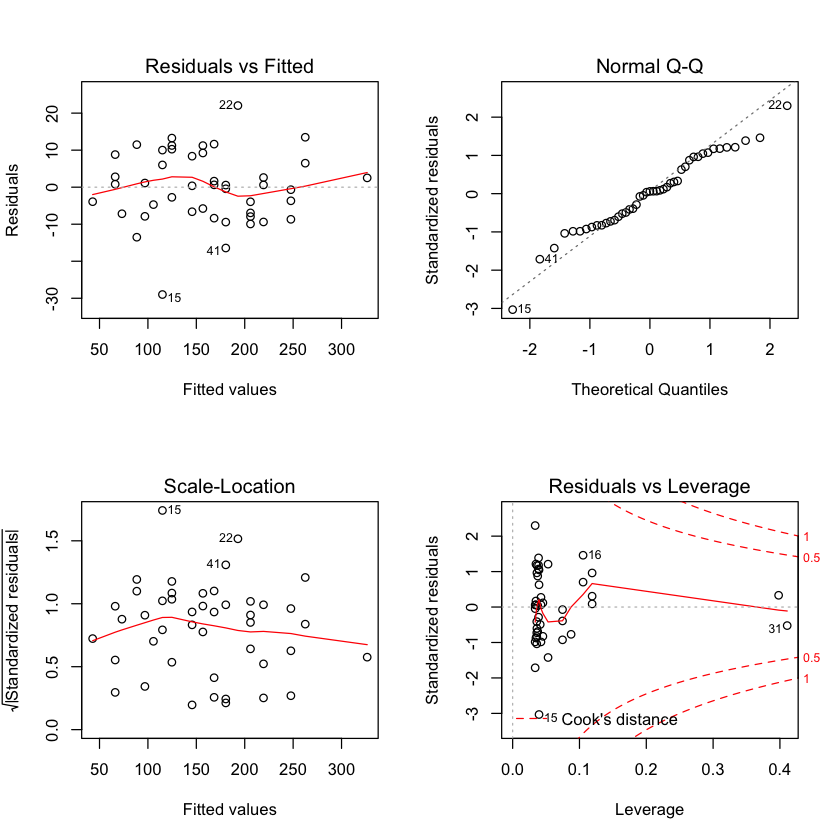

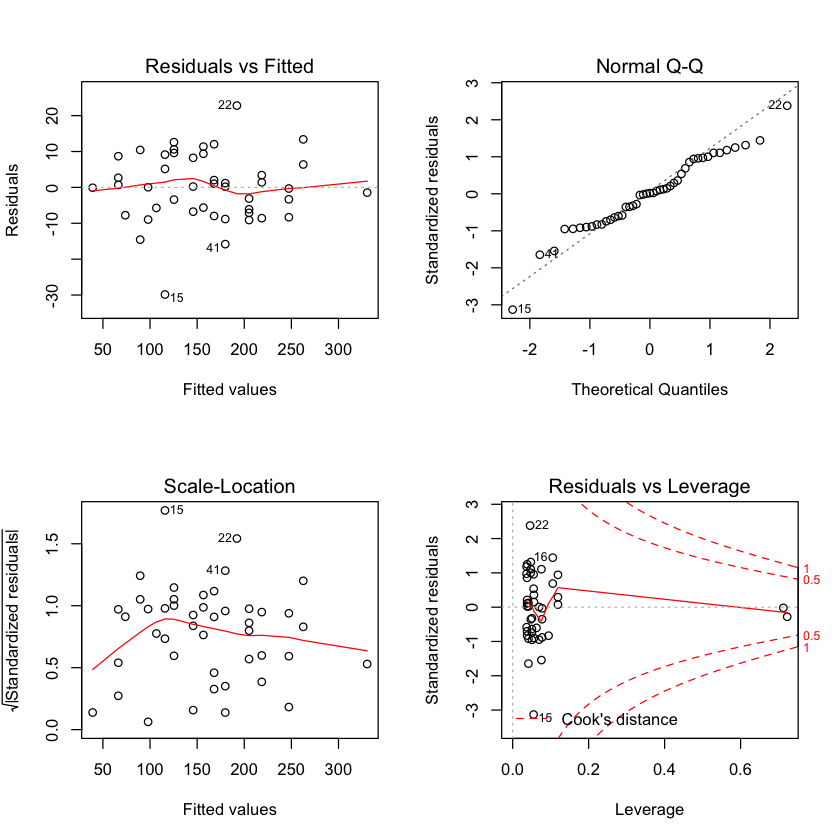

In [46]:
par(mfrow=c(2,2))
plot(modl2)
plot(modl3)
plot(modl4)